<a href="https://colab.research.google.com/github/austinjmitchell/NBA-Playoff-Statistics/blob/main/nbaplayoffs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving playoffstats.csv to playoffstats.csv


In [7]:
import pandas as pd

file_path = "playoffstats.csv"
nba_df = pd.read_csv(file_path)
nba_df.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,1,Joel Embiid,Phi,C,30.2,6,41.4,35.7,15.8,78,...,5.7,1.2,1.5,4.2,43.8,38.7,49.5,12.2,117.1,108.0
1,2,Jalen Brunson,Nyk,G,27.8,13,39.8,36.4,9.3,120,...,7.5,0.8,0.2,2.7,35.7,39.8,43.2,9.3,114.8,114.7
2,3,Damian Lillard,Mil,G,33.9,4,39.1,31.4,10.0,38,...,5.0,1.0,0.0,2.3,34.5,36.3,39.5,8.2,127.6,115.7
3,4,Shai Gilgeous-Alexander,Okc,G,25.9,10,39.9,32.3,8.9,81,...,6.4,1.3,1.7,2.2,37.4,36.6,43.8,11.2,118.3,106.9
4,5,Tyrese Maxey,Phi,G,23.6,6,44.6,28.1,8.6,28,...,6.8,0.8,0.3,2.2,35.0,36.7,41.8,9.1,120.9,113.3


In [10]:
numeric_columns = ['AGE','GP', 'MPG', 'USG%', 'TO%', 'FTA','FT%', '2PA', '2P%','3PA','3P%','eFG%', 'TS%', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'TPG',
                   'P+R', 'P+A', 'P+R+A', 'VI', 'ORtg', 'DRtg']
nba_df[numeric_columns] = nba_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

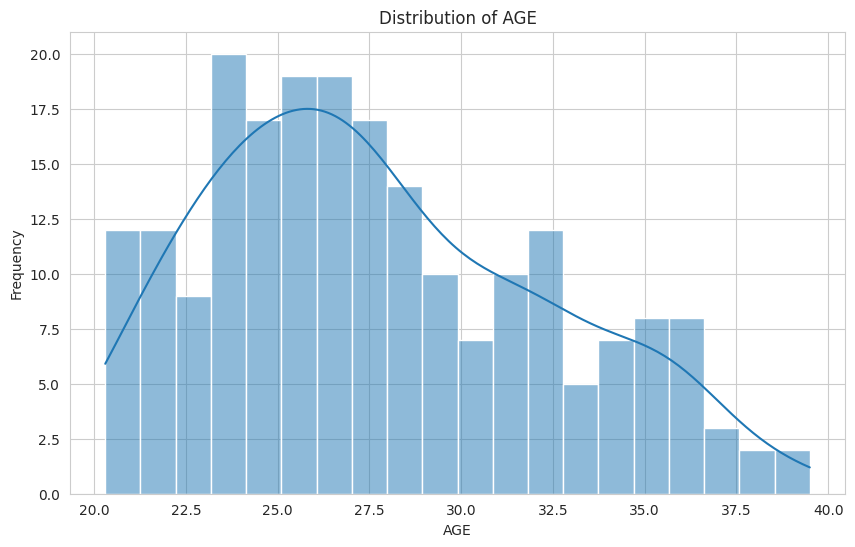

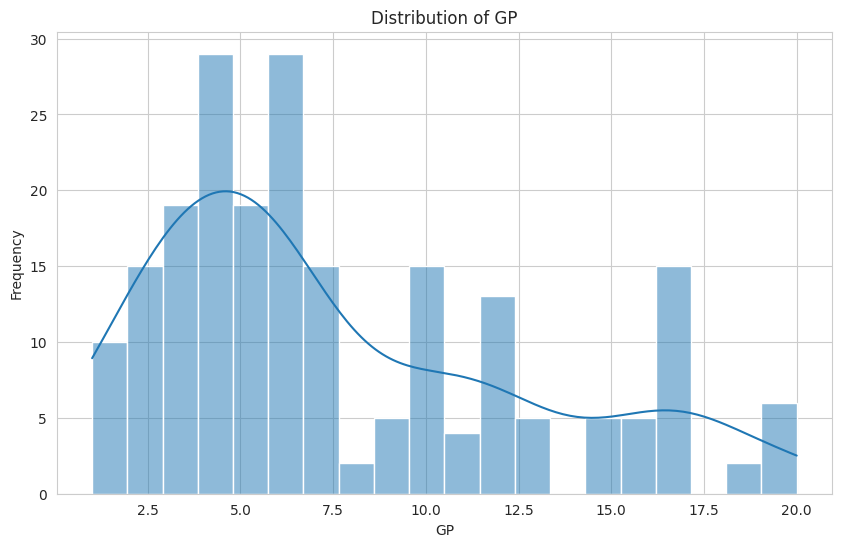

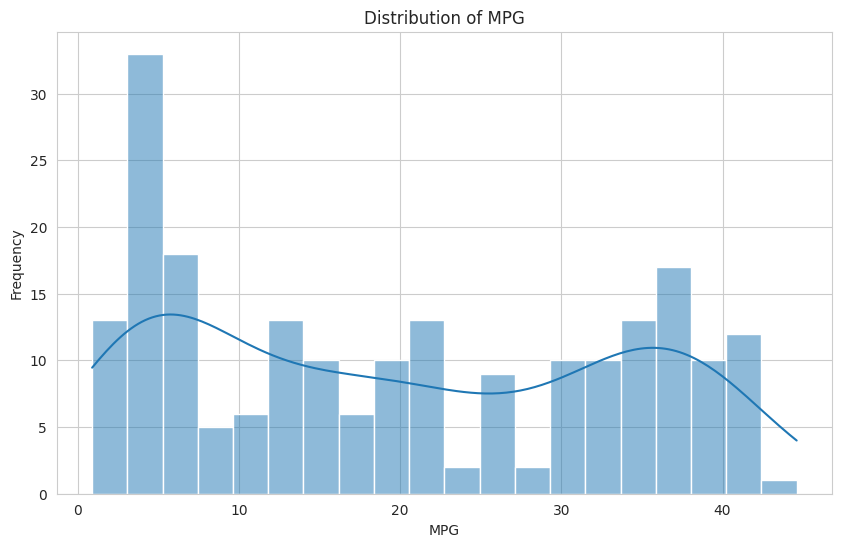

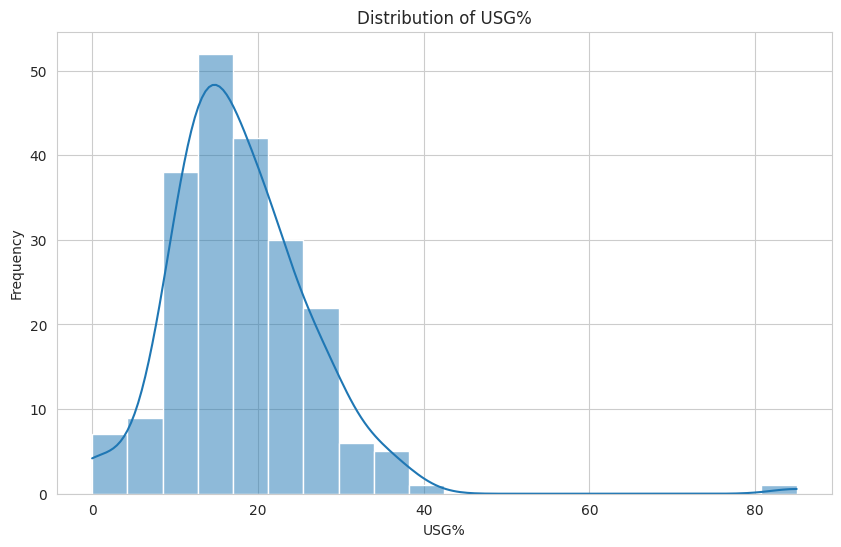

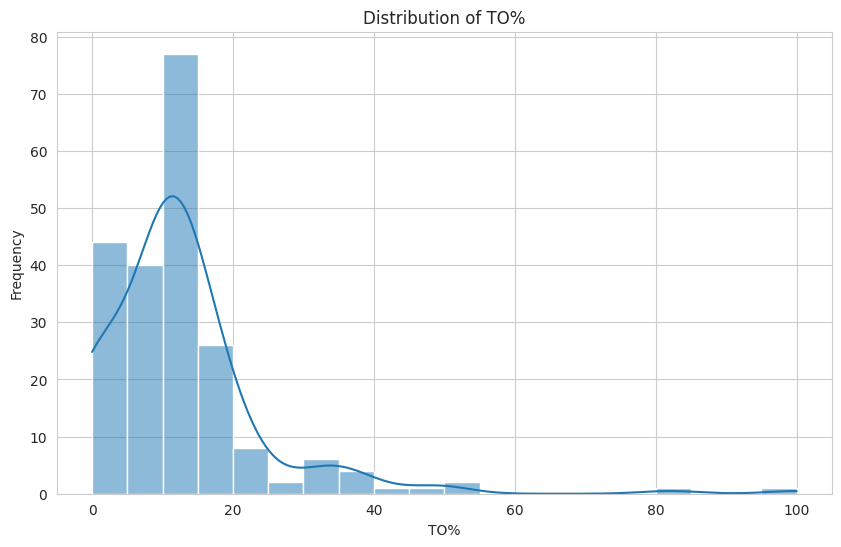

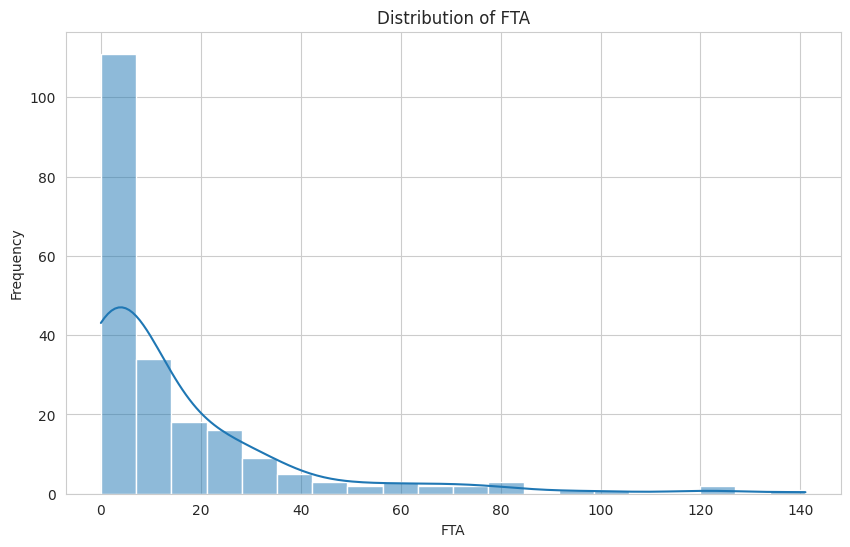

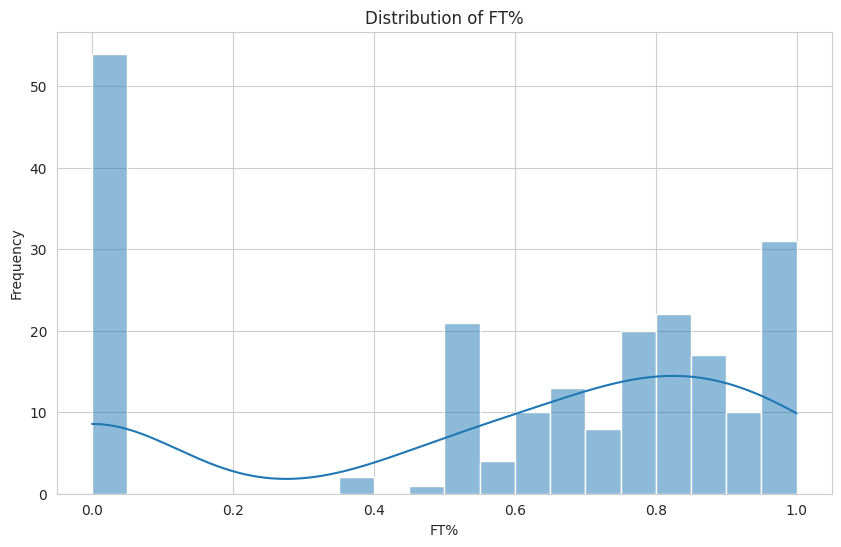

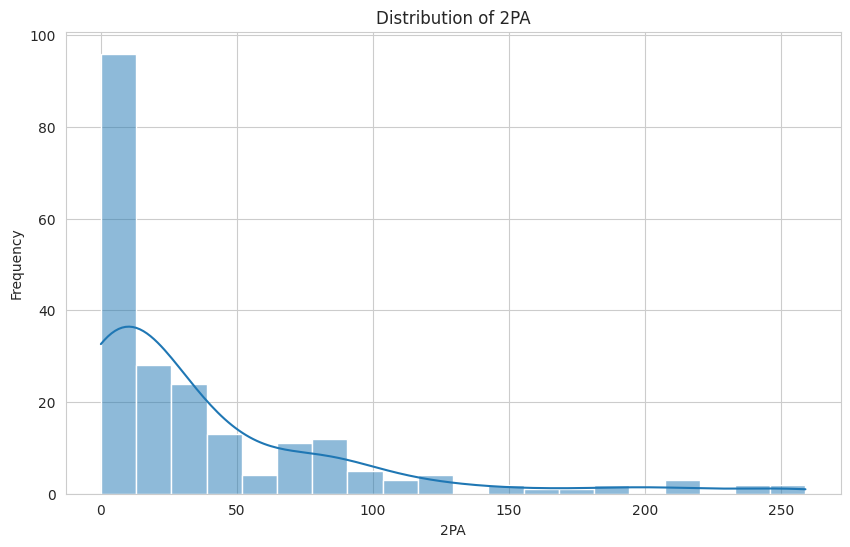

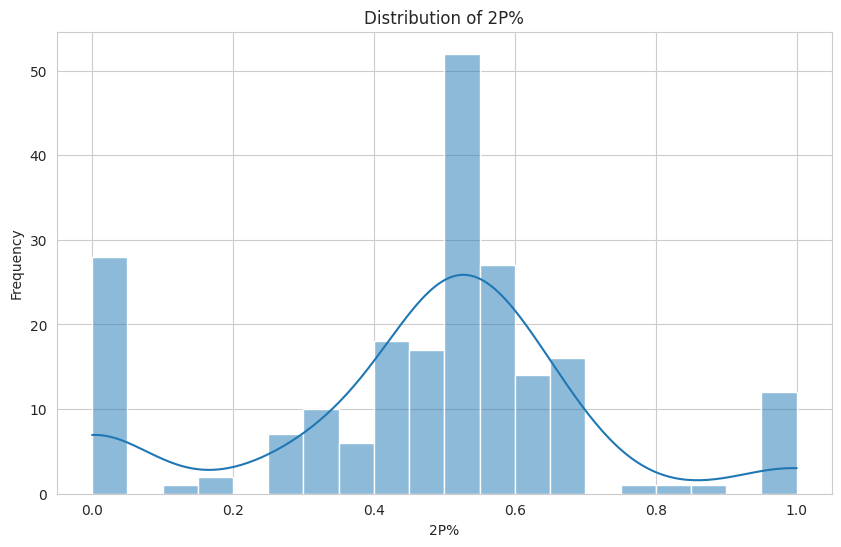

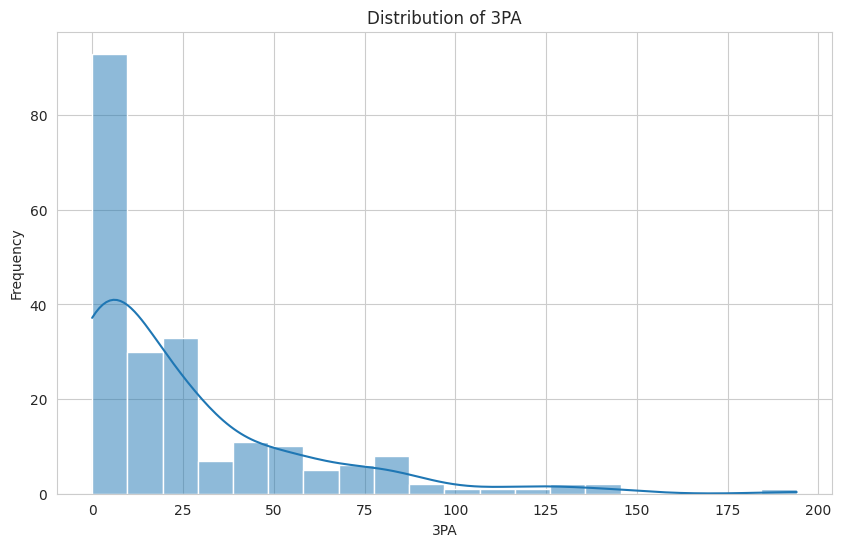

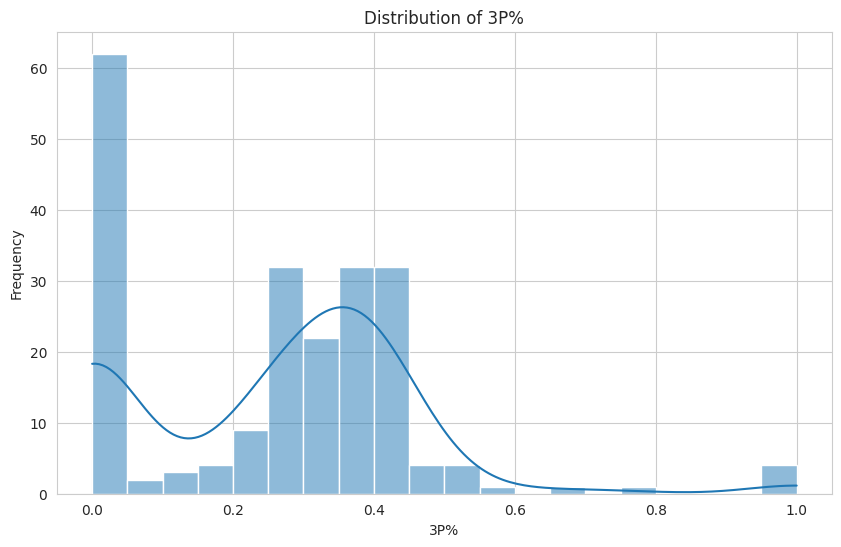

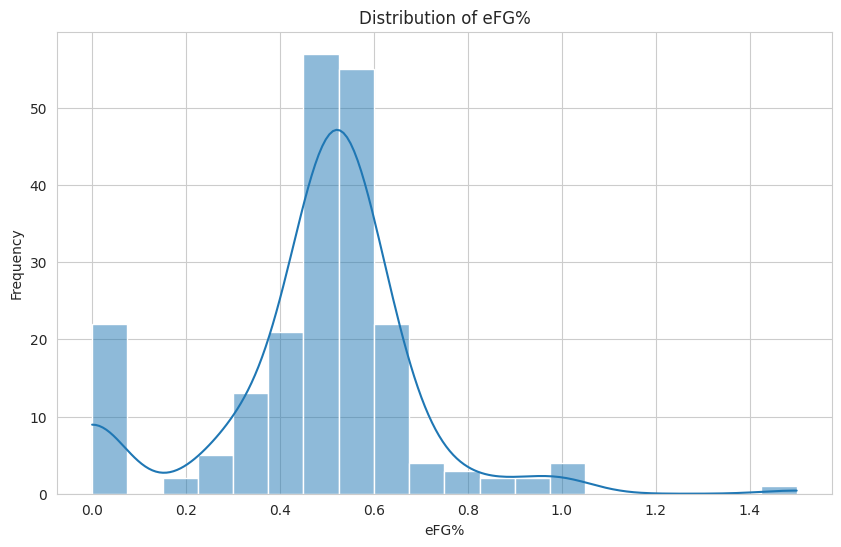

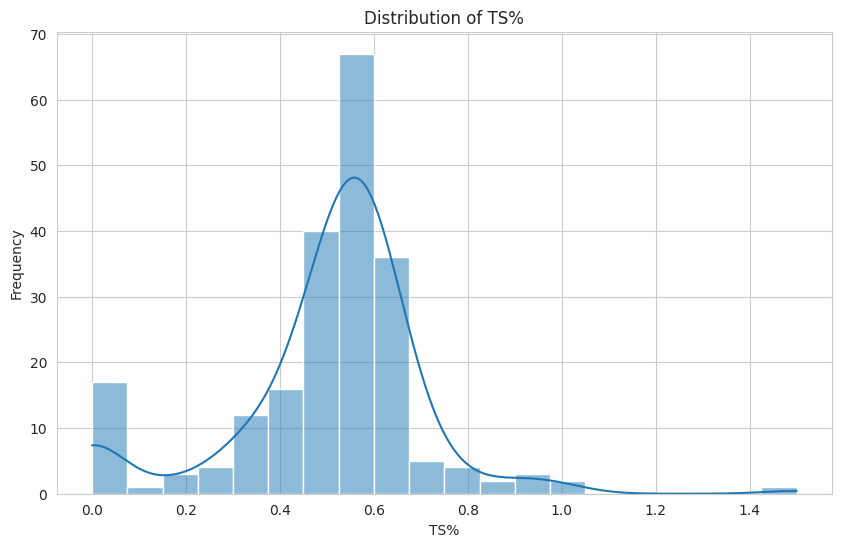

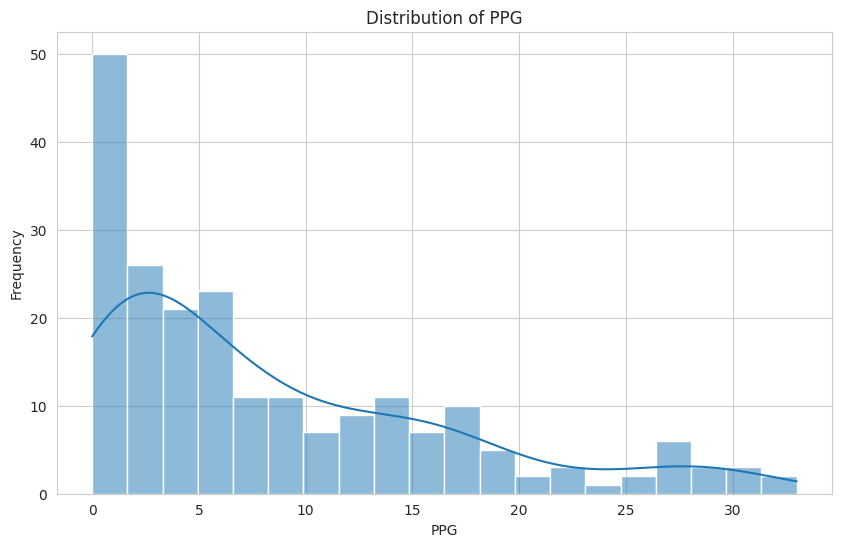

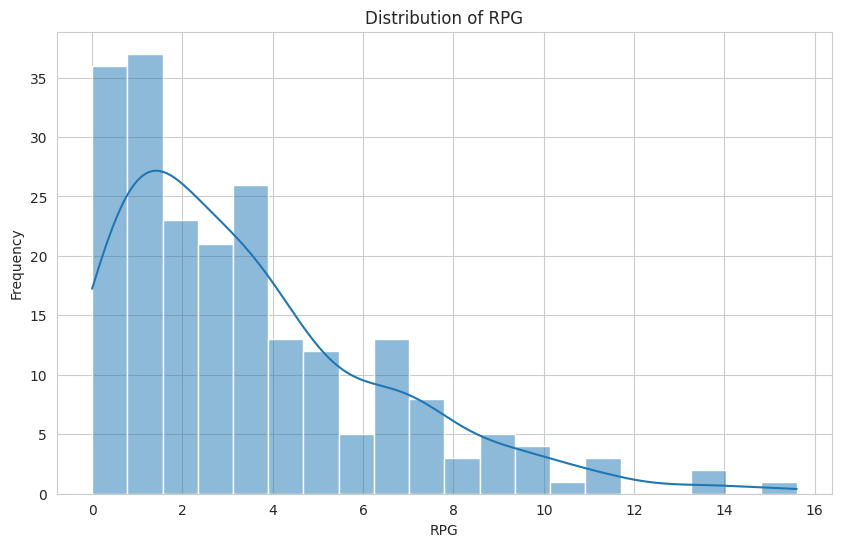

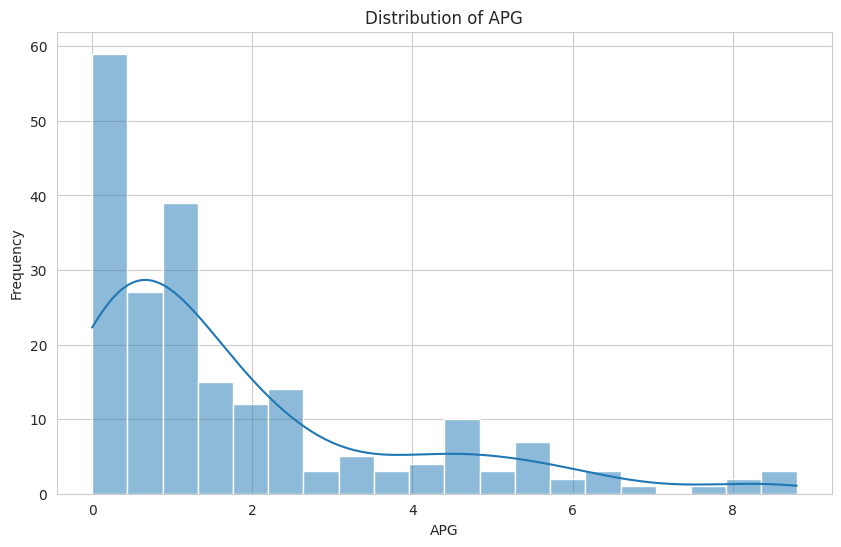

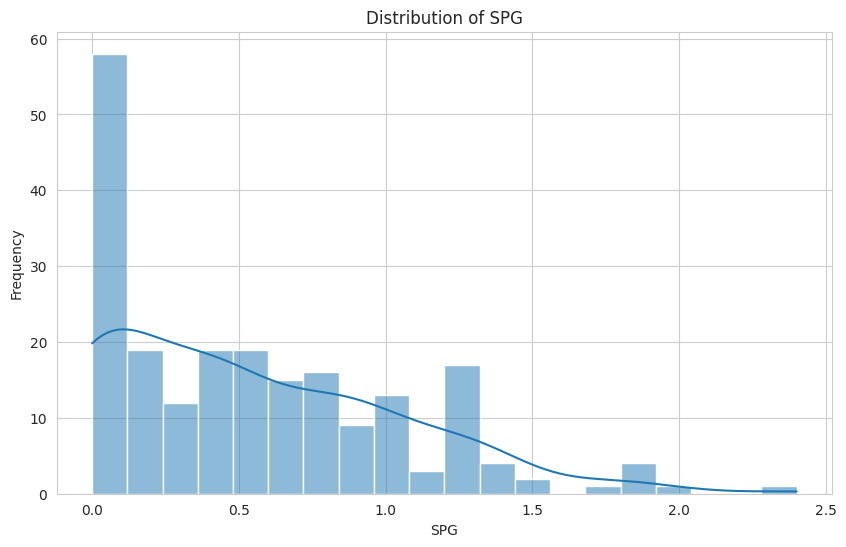

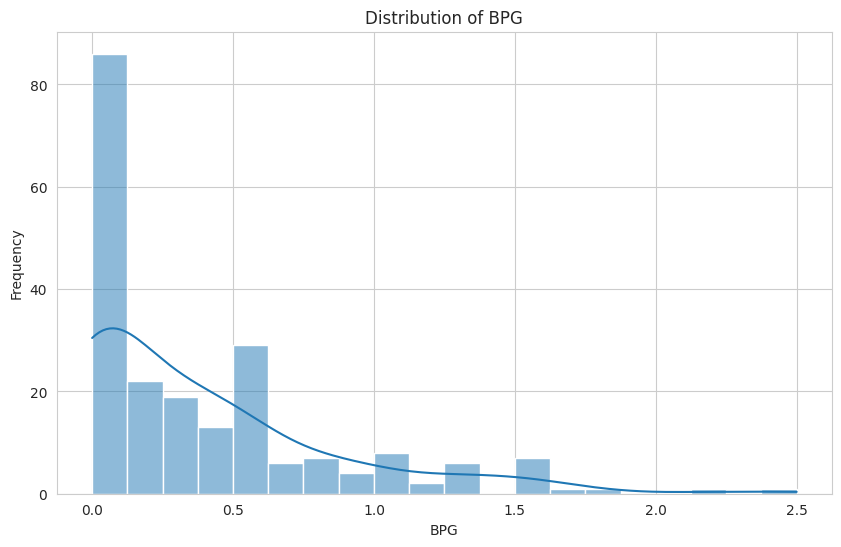

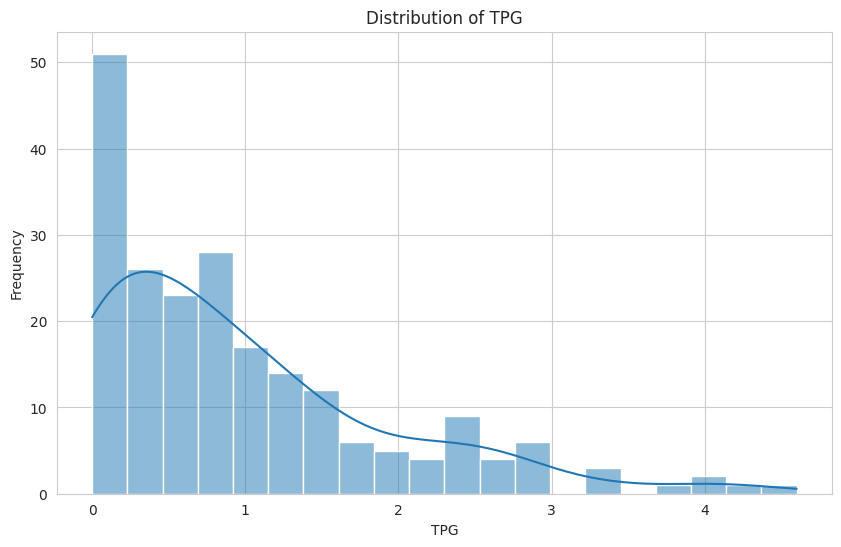

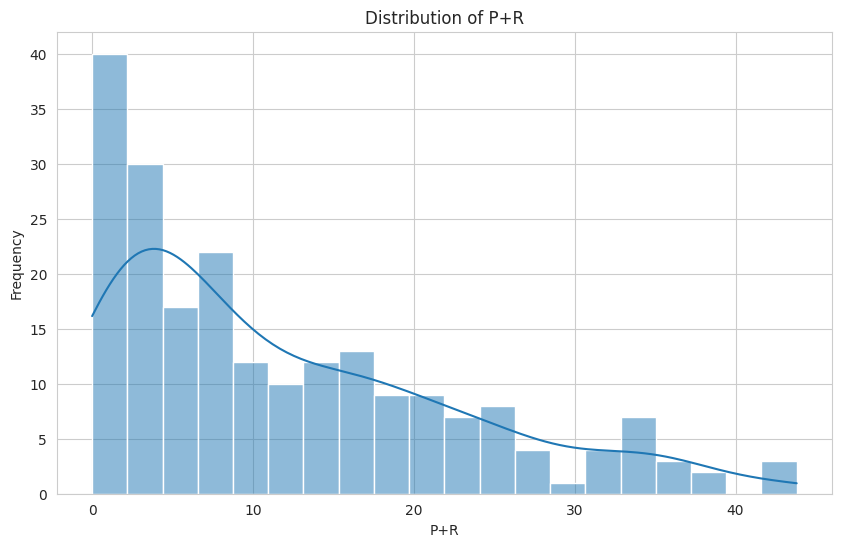

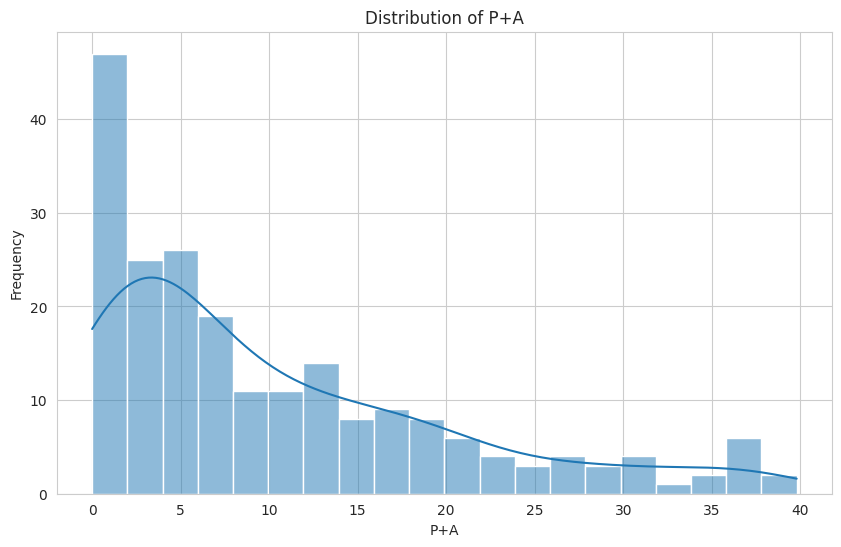

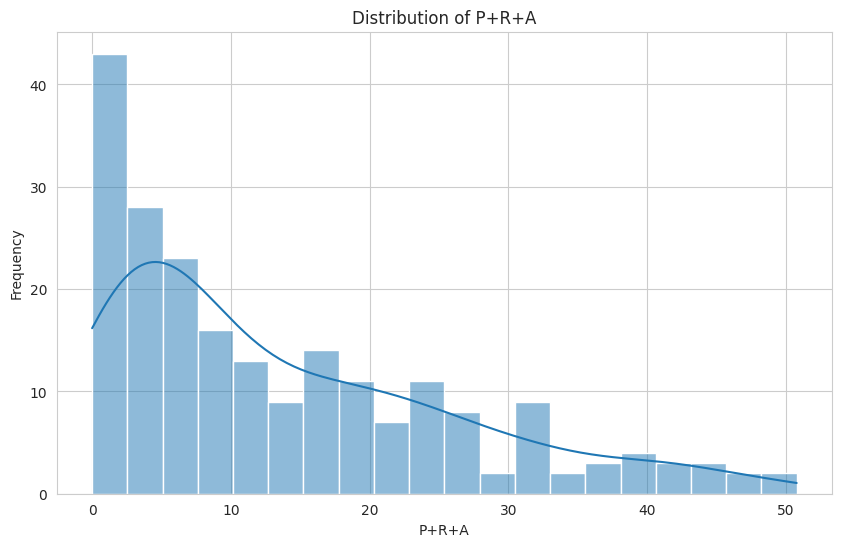

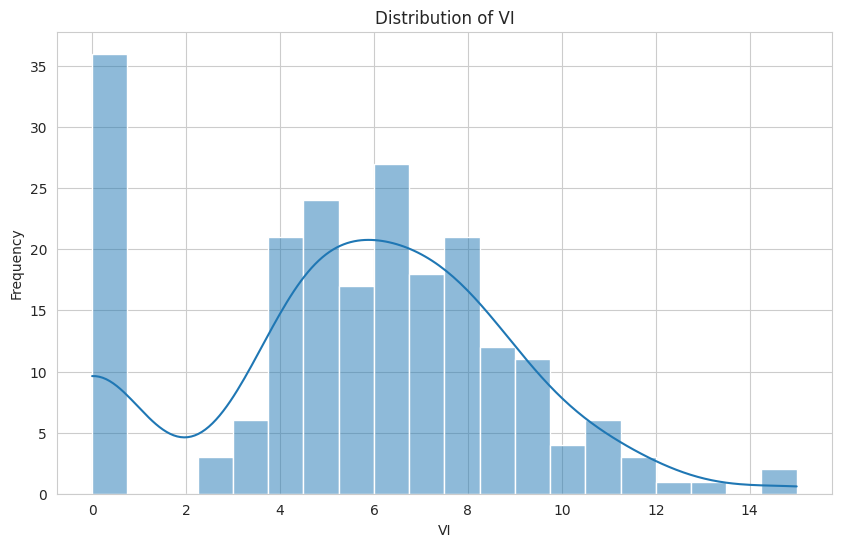

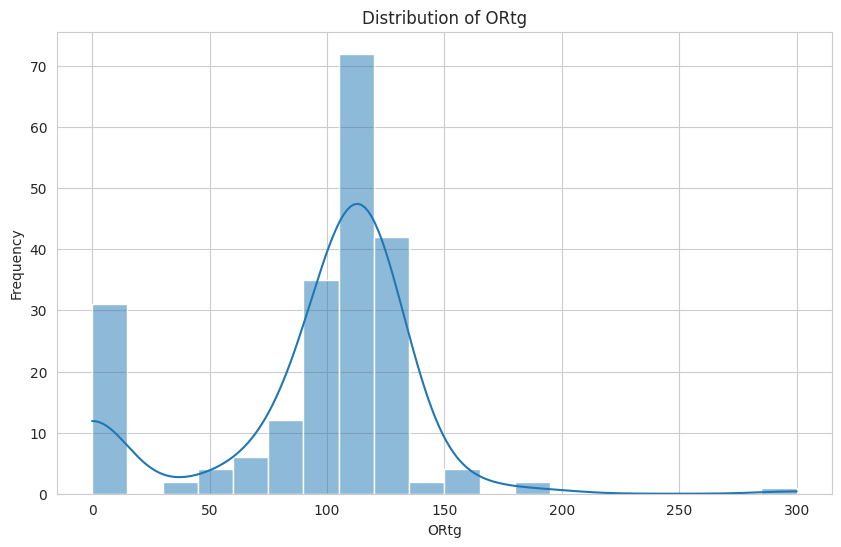

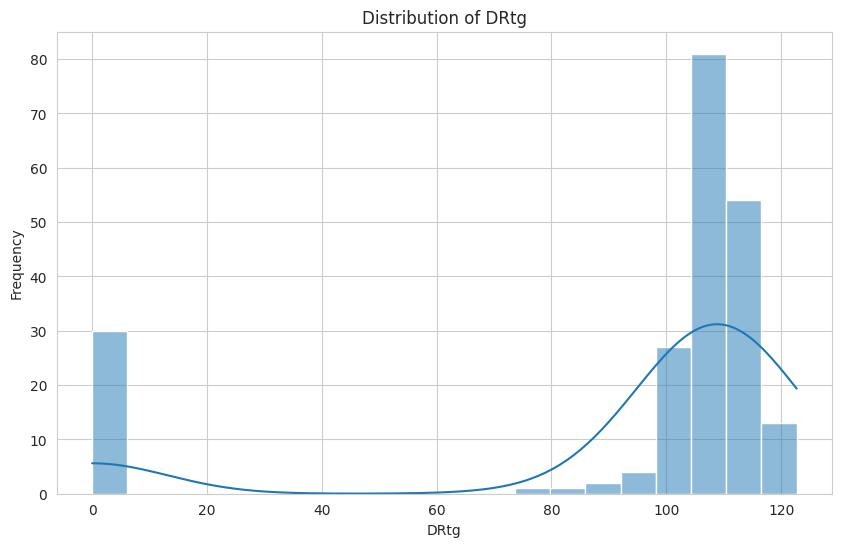

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

def plot_histogram(column):
  plt.figure(figsize=(10,6))
  sns.histplot(nba_df[column], bins =20, kde=True)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

for col in numeric_columns:
  plot_histogram(col)

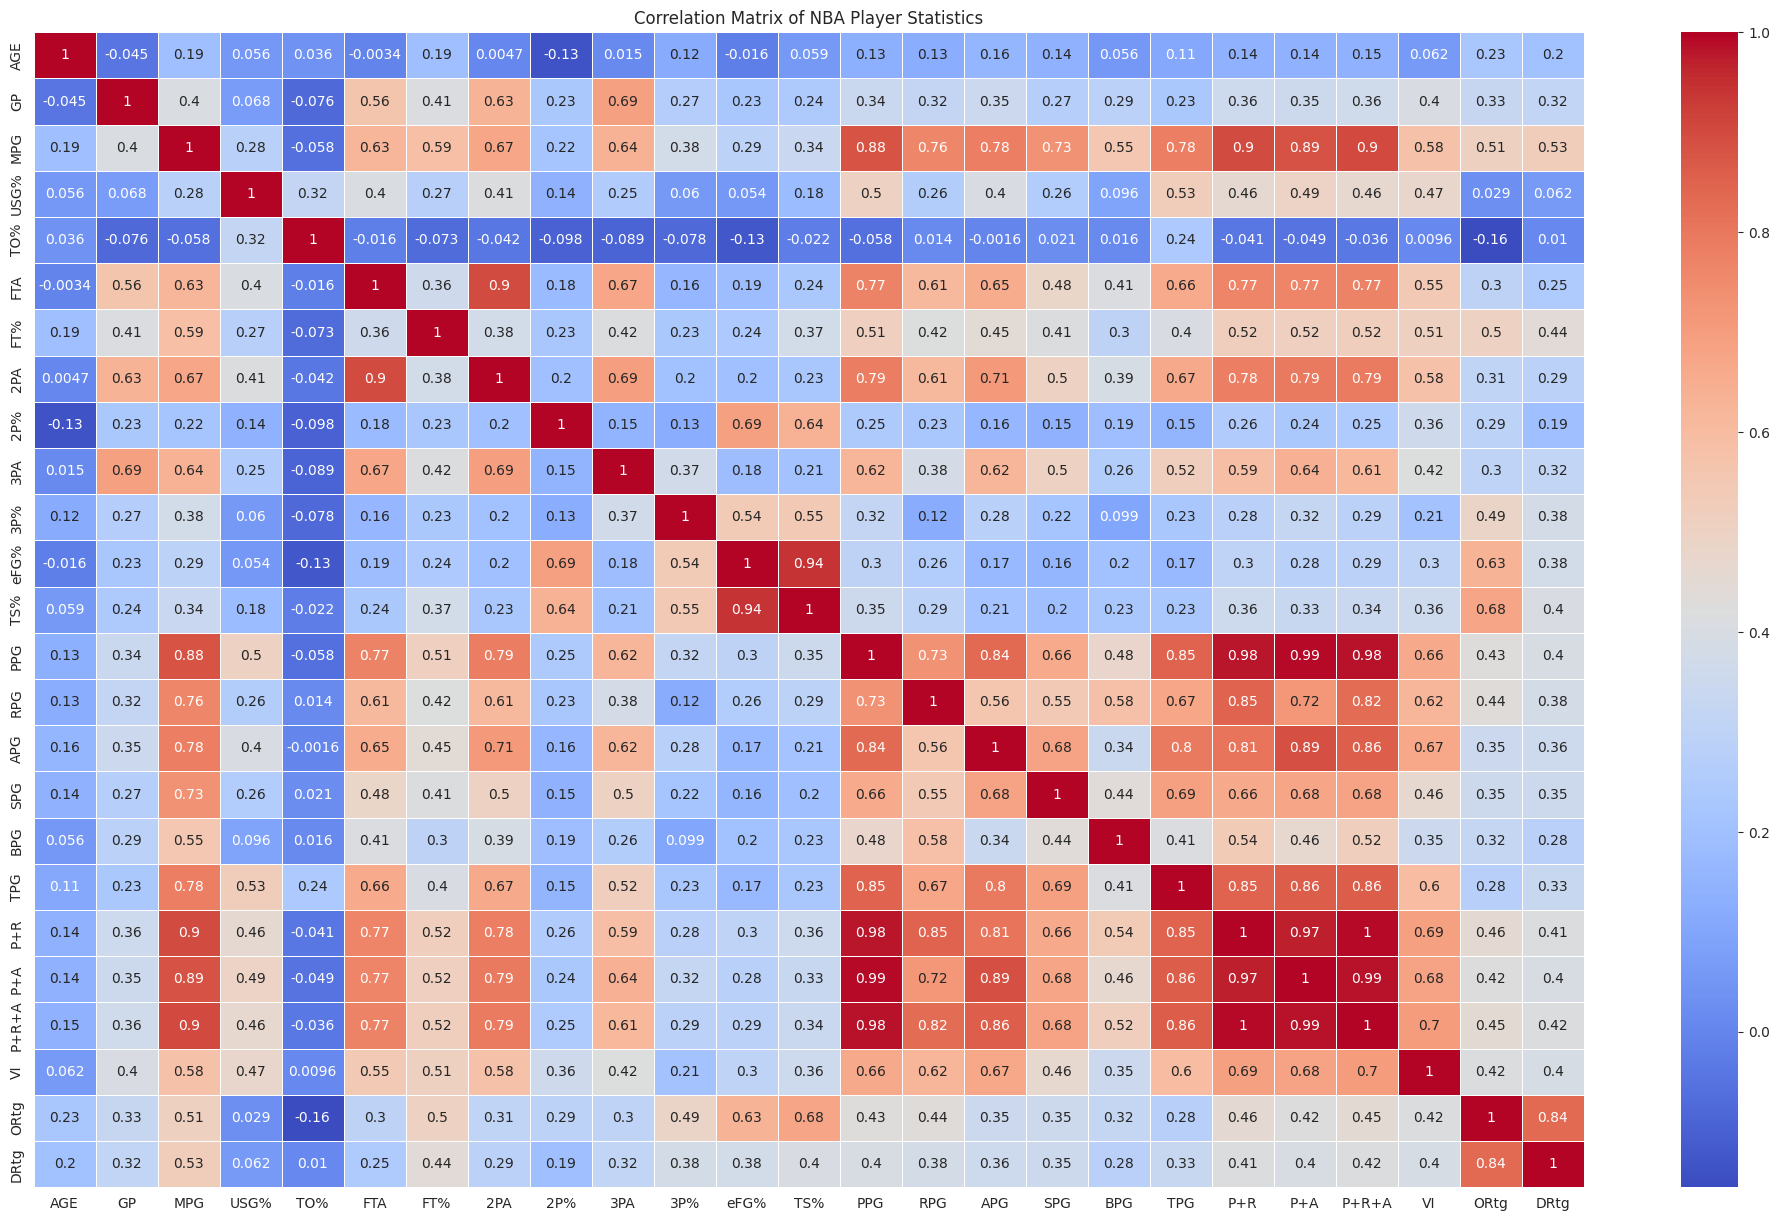

In [12]:
correlation_matrix = nba_df[numeric_columns].corr()
plt.figure(figsize=(25,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of NBA Player Statistics')
plt.show()

In [16]:
top_scorers = nba_df[['RANK', 'NAME', 'TEAM', 'PPG']].sort_values(by='PPG', ascending=False).head(10)
print("Top 10 Scorers: \n", top_scorers)

Top 10 Scorers: 
    RANK                     NAME TEAM   PPG
0     1              Joel Embiid  Phi  33.0
1     2            Jalen Brunson  Nyk  32.4
2     3           Damian Lillard  Mil  31.3
3     4  Shai Gilgeous-Alexander  Okc  30.2
4     5             Tyrese Maxey  Phi  29.8
5     6         Donovan Mitchell  Cle  29.6
6     7              Luka Doncic  Dal  28.9
7     8             Nikola Jokic  Den  28.7
8     9             LeBron James  Lal  27.8
9    10            Anthony Davis  Lal  27.8


In [17]:
top_rebounders = nba_df[['RANK', 'NAME', 'TEAM', 'RPG']].sort_values(by='RPG', ascending=False).head(10)
print("Top 10 Rebounders: \n", top_rebounders)

Top 10 Rebounders: 
     RANK               NAME TEAM   RPG
9     10      Anthony Davis  Lal  15.6
32    33      Jarrett Allen  Cle  13.8
7      8       Nikola Jokic  Den  13.4
47    48          Josh Hart  Nyk  11.5
36    37       Bobby Portis  Mil  11.3
46    47  Jonas Valanciunas  Nor  11.0
0      1        Joel Embiid  Phi  10.8
14    15       Jayson Tatum  Bos  10.1
59    60        Rudy Gobert  Min   9.8
6      7        Luka Doncic  Dal   9.6


In [18]:
top_assists = nba_df[['RANK', 'NAME', 'TEAM', 'APG']].sort_values(by='APG', ascending=False).head(10)
print("Top 10 Assisters: \n", top_assists)

Top 10 Assisters: 
     RANK                     NAME TEAM  APG
8      9             LeBron James  Lal  8.8
7      8             Nikola Jokic  Den  8.7
6      7              Luka Doncic  Dal  8.4
25    26        Tyrese Haliburton  Ind  8.2
20    21             James Harden  Lac  8.0
1      2            Jalen Brunson  Nyk  7.5
4      5             Tyrese Maxey  Phi  6.8
10    11          Anthony Edwards  Min  6.5
3      4  Shai Gilgeous-Alexander  Okc  6.4
14    15             Jayson Tatum  Bos  6.2


/tmp/ipython-input-1862795169.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='NAME', data=top_performers, palette='viridis')


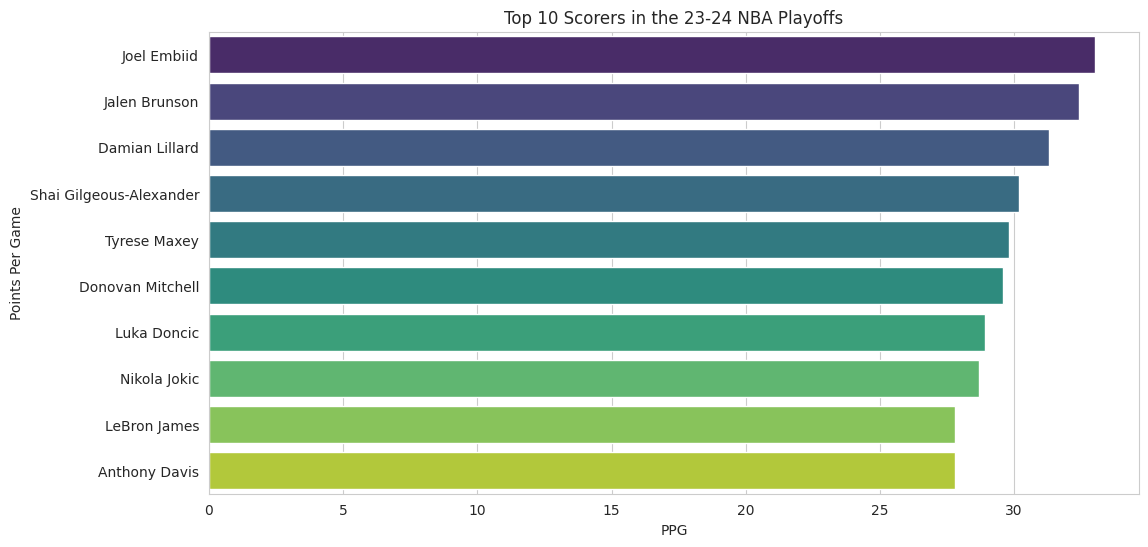

/tmp/ipython-input-1862795169.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='NAME', data=top_performers, palette='viridis')


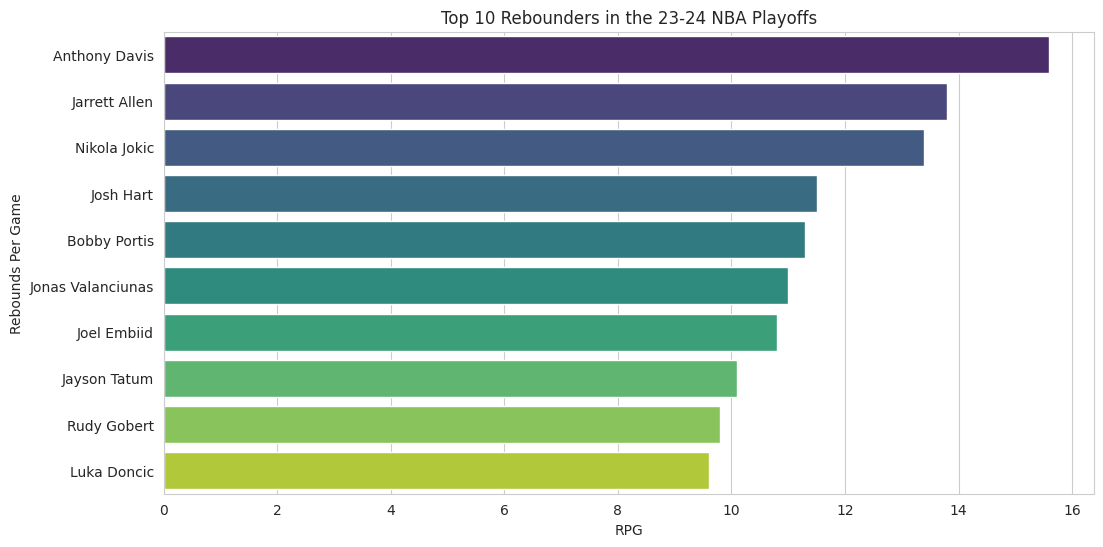

/tmp/ipython-input-1862795169.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='NAME', data=top_performers, palette='viridis')


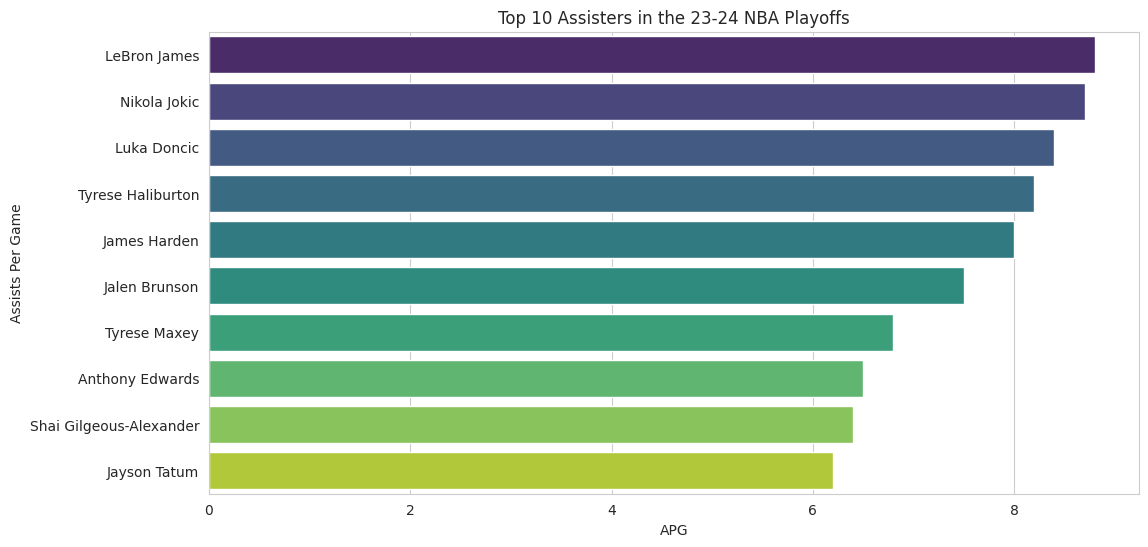

In [20]:
def plot_top_performers(column, title, ylabel):
  top_performers = nba_df[['RANK', 'NAME', 'TEAM', column]].sort_values(by=column, ascending=False).head(10)
  plt.figure(figsize=(12,6))
  sns.barplot(x=column, y='NAME', data=top_performers, palette='viridis')
  plt.title(title)
  plt.xlabel(column)
  plt.ylabel(ylabel)
  plt.show()

plot_top_performers('PPG', 'Top 10 Scorers in the 23-24 NBA Playoffs', 'Points Per Game')
plot_top_performers('RPG', 'Top 10 Rebounders in the 23-24 NBA Playoffs', 'Rebounds Per Game')
plot_top_performers('APG', 'Top 10 Assisters in the 23-24 NBA Playoffs', 'Assists Per Game')